# Eka Suwandi Yuliantho - 0706022210037

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [128]:
#load the datasets
df = pd.read_csv('https://raw.githubusercontent.com/ihavenonamesad/Breast-Cancer-Dataset/refs/heads/main/UCI%20breast-cancer-wisconsin-data(1).csv')

df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
35,854253,M,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.060180,...,20.01,29.02,133.50,1229.0,0.15630,0.38350,0.54090,0.18130,0.4863,0.08633
382,90250,B,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.029780,...,12.57,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
279,8911834,B,13.850,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.037110,...,14.98,21.74,98.37,670.0,0.11850,0.17240,0.14560,0.09993,0.2955,0.06912
92,861853,B,13.270,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.026480,...,16.36,22.35,104.50,830.6,0.10060,0.12380,0.13500,0.10010,0.2027,0.06206
234,882488,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.016670,...,10.51,19.16,65.74,335.9,0.15040,0.09515,0.07161,0.07222,0.2757,0.08178
496,914366,B,12.650,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.050740,...,14.38,22.15,95.29,633.7,0.15330,0.38420,0.35820,0.14070,0.3230,0.10330
50,857343,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,...,12.98,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
398,904302,B,11.060,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,...,12.68,20.35,80.79,496.7,0.11200,0.18790,0.20790,0.05556,0.2590,0.09158
201,877989,M,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.074880,...,20.42,25.84,139.50,1239.0,0.13810,0.34200,0.35080,0.19390,0.2928,0.07867
325,89511502,B,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.021070,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888


In [129]:
#show the info of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [130]:
#show the description for the numerical values of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [131]:
#drop the nulls in the datasets
df.dropna(inplace=True)
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

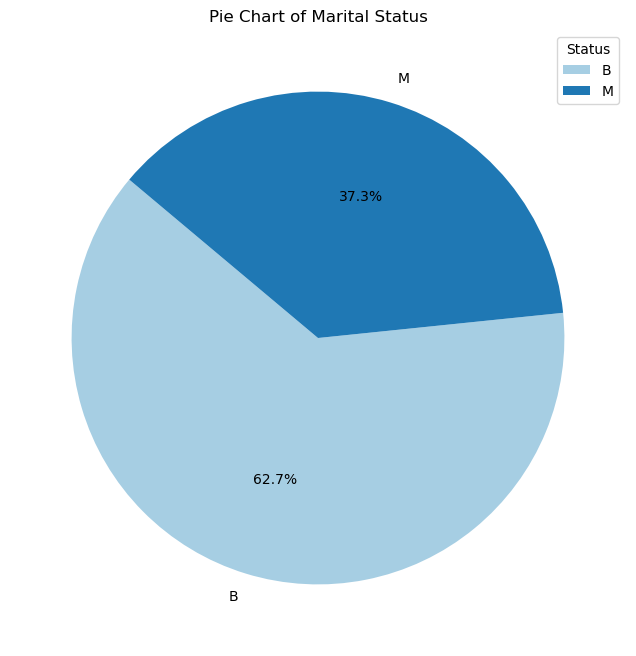

In [140]:
#stacked bar graph
value_counts = df['diagnosis'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Marital Status' )
plt.legend(title='Status')
plt.show()
#this graph explains that more women have breast cancer with Diagnosis B that means most of them have a chance to stay alive.

C:\Users\ekasu\AppData\Local\Temp\ipykernel_26936\2216488148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


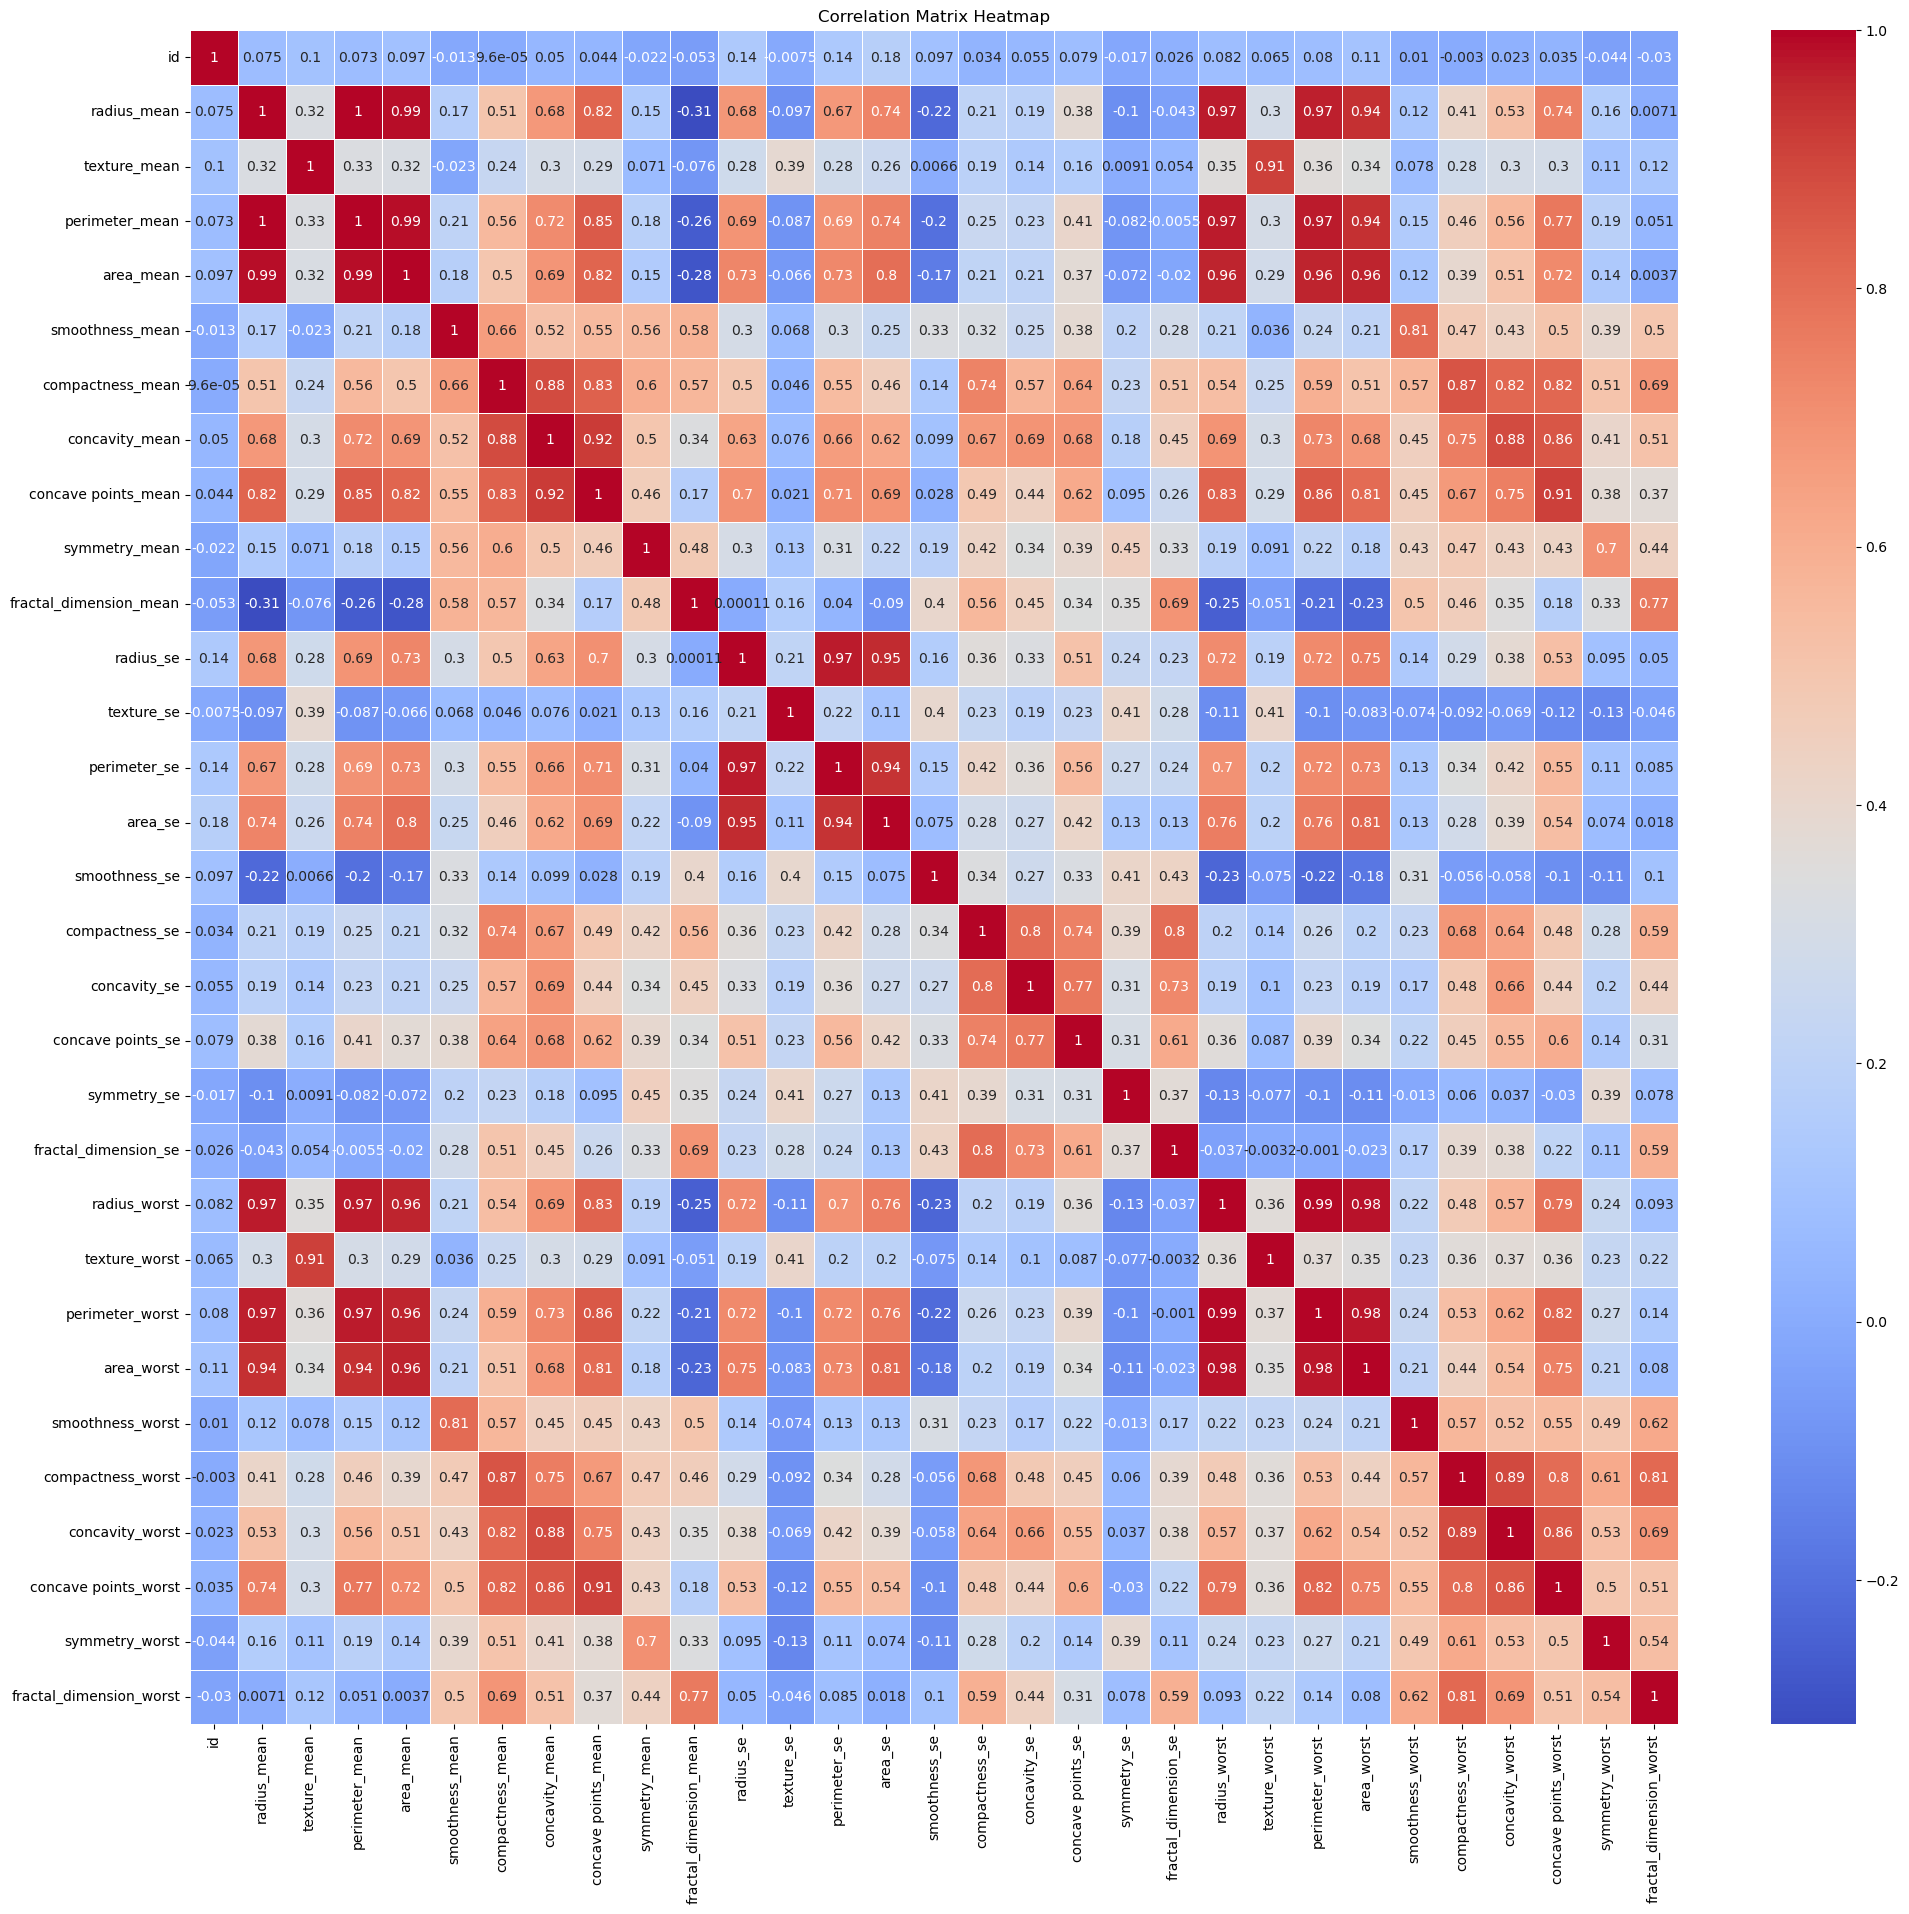

In [141]:
#Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(24, 22))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [143]:
#Import string value to float using the chosen columns
df['diagnosis'] = df['diagnosis'].replace({'B': 1, 'M': 2}).astype(float)

In [144]:
# Assign predictors and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [145]:
#split the x and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [146]:
#see the shape of the both x of train and test
X_train.shape, X_test.shape

((455, 31), (114, 31))

## Decision Tree

In [147]:
# import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [148]:
# a. Define Model
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [150]:
# b. Predict the test set results
y_pred_en = clf_en.predict(X_test)

In [151]:
# c. Check Accuracy Score
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9649


In [152]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))

Training set score: 0.9802


[Text(0.5769230769230769, 0.875, 'x[8] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3076923076923077, 0.625, 'x[21] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [266, 16]'),
 Text(0.15384615384615385, 0.375, 'x[14] <= 48.7\nentropy = 0.136\nsamples = 263\nvalue = [258, 5]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [257, 3]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.8461538461538461, 0.625, 'x[23] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [20, 153]'),
 Text(0.7692307692307693, 0.375, 'x[22] <= 25.655\nentropy = 0.994\nsamples = 44\nvalue = [20, 24]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.454\n

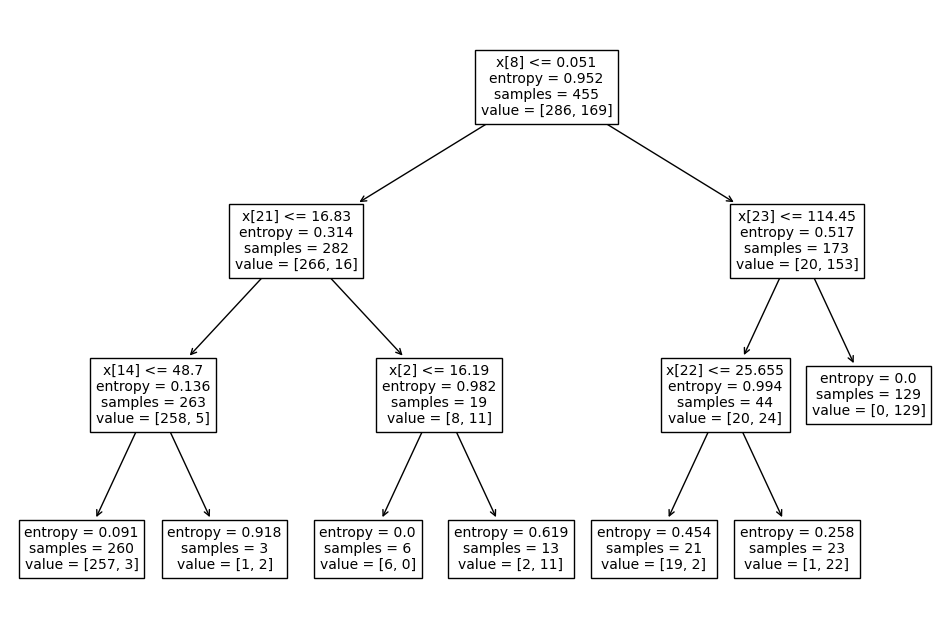

In [153]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

2. Criterion Gini Index

In [154]:
# a. Define Model
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [155]:
# b. Predict the test set results
y_pred_gini = clf_gini.predict(X_test)

In [156]:
# c. Check Accuracy Score
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.9474


In [157]:
# d. Check for overfitting and underfitting
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))

Training set score: 0.9780


[Text(0.5, 0.875, 'x[8] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'x[21] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.125, 0.375, 'x[14] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'x[2] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.75, 0.625, 'x[28] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.375, 'x[23] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.875, 0.375, 'x[17] <= 0.136\ngini = 0.029\nsamples = 138\nvalue = [2, 136]')

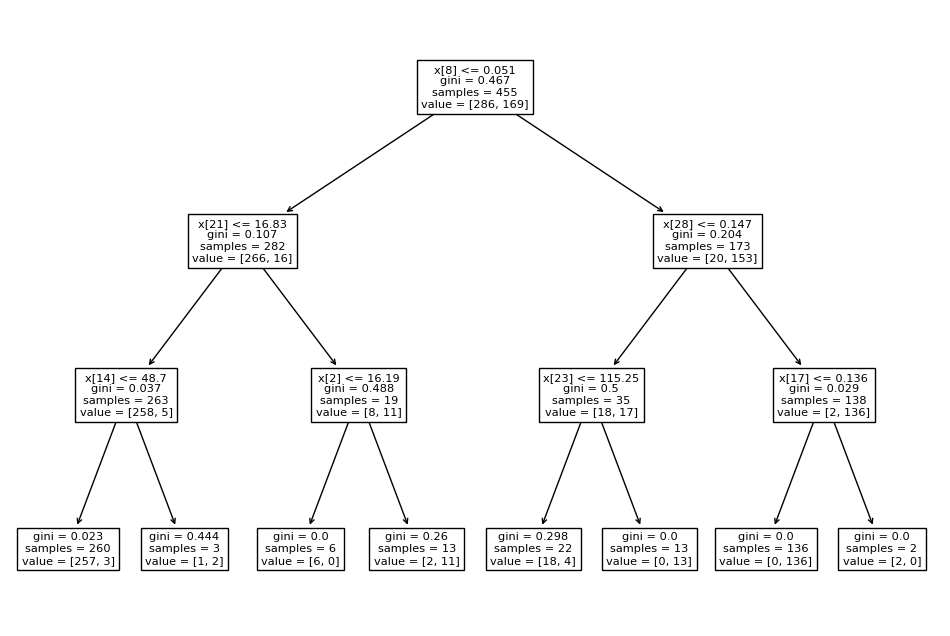

In [158]:
# e. Visualize decision trees
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

Entropy


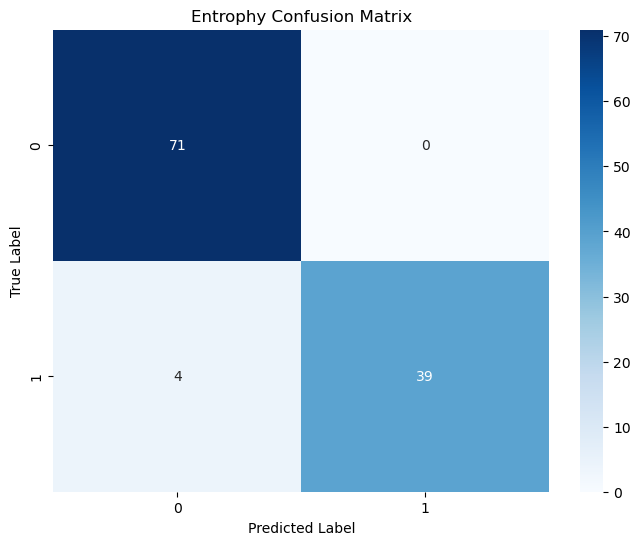


Gini Index


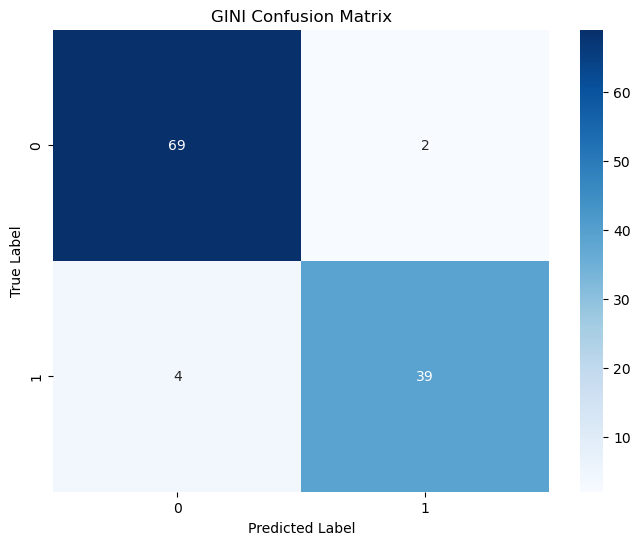

In [159]:
# f. Confusion Matrix

print("Entropy")
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Entrophy Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print()
print("Gini Index")

cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("GINI Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [160]:
# g. Classification Report
print("Entropy")
print(classification_report(y_test, y_pred_en))
print()
print("Gini Index")
print(classification_report(y_test, y_pred_gini))

Entropy
              precision    recall  f1-score   support

         1.0       0.95      1.00      0.97        71
         2.0       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Gini Index
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96        71
         2.0       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [161]:
print("From the report above the accuracy Entropy and Gini have different accuracy of 0.1 with entropy having more.")
print("So suggested to use entropy to predict")

Both models perform the same and have the same results
This means that both Gini and Entropy metric's will provide a consistent and valid basis for making decisions


## Naive Bayes

In [162]:
#import library naive bayes
from sklearn.naive_bayes import GaussianNB

In [163]:
#fit the X train and y train to predict
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [164]:
#predict using X test
nb_y_pred = nb_classifer.predict(X_test)

In [165]:
#see the accuracy score with Naive Bayes
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.6140


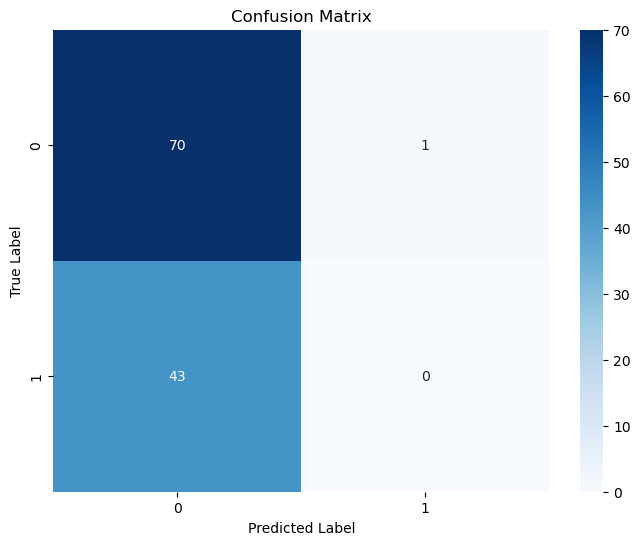

In [166]:
#see the confusion matrix with naive bayes
cm_nb = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [167]:
#Classification Report of the datasets
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

         1.0       0.62      0.99      0.76        71
         2.0       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



In [168]:
print("Naive Bayes has the accuracy of 0.61, meanwhile decision tree's entropy has 0.96.")
print("So suggested to use entropy to predict the dataset")

## Logistic Regression

In [174]:
#fit the x and y train to the Logistic Regression
from sklearn.linear_model import LogisticRegression

# Make the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [175]:
#predict the x test using the knn classifier
y_pred_log = model.predict(X_test)

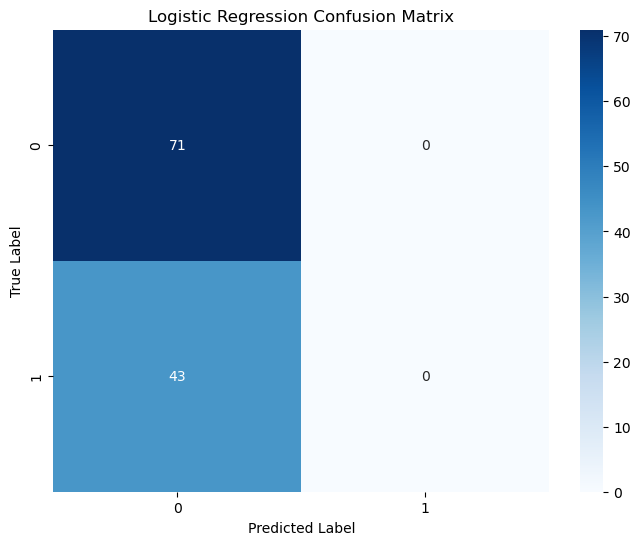

In [178]:
#confusion matrix of the knn
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8,6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [179]:
#show the accuracy score of knn
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy Score using K-Nearest Neighbors:", accuracy_log)

Accuracy Score using K-Nearest Neighbors: 0.6228070175438597


In [180]:
#show classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         1.0       0.62      1.00      0.77        71
         2.0       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
print("Logistic Regression accuracy's is 0.62 and that is higher accuracy than naive bayes but lower than entropy and gini")
print("So still suggested on using decision tree entropy")

Logistic Regression accuracy's is 0.62 and that is higher accuracy than naive bayes but lower than entropy and gini
So still suggested on using decision tree entropy
